# “your_off-facebook_activity” report


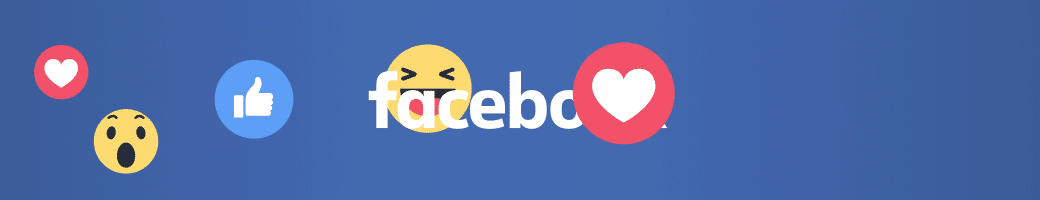

### By: Daniel Popescu


#### 1. Overview

The purpose of this report is to show how frequently these apps request facebook data and if they all do it with the same frequency. 

In [2]:
import json
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd

In order to read our data, we will need to use json in order to open our file titled "your_off_facebook_activity".

In this file we win find all the data neccessary for this project. The json command below opens said file.

In [3]:
with open(r"C:\Users\Daniel\Desktop\EMAT 22110\Facebook data\facebook-davidsilva100046_toshare\ads_and_businesses\your_off-facebook_activity.json") as f:
    act = json.load(f)
act.keys()

dict_keys(['off_facebook_activity'])

#### 2. The Data

The data we are going to use came from Professor Silva's facebook account which was uploaded to blackboard as a sample to be used for this projects.

The data is reliable and easy to trust since it is provided by a professor.

#### 3. Data Preparation

Below we are putting the data from our file into a DataFrame in order to easily organize and read it. 

In this table we assign the data to certain columns and we visualize a collection of event types. 

In [6]:
apps = []
events = []
actapp = []
custom = []
search = []
viewc = []
ad = []
view = []

for i in act['off_facebook_activity']:
    apps.append(i['name'])
    events.append((len(i['events'])))
    actapp.append(len([x for x in i['events'] if x['type'] == 'ACTIVATE_APP']))
    custom.append(len([x for x in i['events'] if x['type'] == 'CUSTOM']))
    search.append(len([x for x in i['events'] if x['type'] == 'SEARCH']))
    viewc.append(len([x for x in i['events'] if x['type'] == 'VIEW_CONTENT']))
    ad.append(len([x for x in i['events'] if x['type'] == 'AD_REQUEST']))
    view.append(len([x for x in i['events'] if x['type'] == 'PAGE_VIEW']))

In [7]:
appbyevent = pd.DataFrame(columns = ('App', 'Event Count', 'Activate App', 'Custom', 'Search', 'View Content', 'Ad Request', 'Page Views'))
appbyevent['App'] = apps
appbyevent['Event Count'] = events
appbyevent['Activate App'] = actapp
appbyevent['Custom'] = custom
appbyevent['Search'] = search
appbyevent['View Content'] = viewc
appbyevent['Ad Request'] = ad
appbyevent['Page Views'] = view
appbyevent.head()

,App,Event Count,Activate App,Custom,Search,View Content,Ad Request,Page Views
0,U.S. Bank - Inspired by customers,18,18,0,0,0,0,0
1,"Egg, Inc.",165,109,0,0,0,35,0
2,AP News,465,133,325,0,0,7,0
3,TikTok - Make Your Day,371,99,267,5,0,0,0
4,uoregon.edu,1,0,0,0,0,0,1


After we have showed our even types in the table above. We can proceed to looking at the distributions of frequencies per event.

First we use scipy to import our stats.

In [10]:
from scipy import stats

In [11]:
obs = np.array([appbyevent['Activate App'][:4], appbyevent['Custom'][:4]])
obs

array([[ 18, 109, 133,  99],
       [  0,   0, 325, 267]], dtype=int64)

In [12]:
stats.chi2_contingency(obs)

(242.04711361320508,
 3.434079785684188e-52,
 3,
 array([[  6.79495268,  41.14721346, 172.893796  , 138.16403785],
        [ 11.20504732,  67.85278654, 285.106204  , 227.83596215]]))

In the following table we are only going to show the apps that have a few events.

The apps with no events will not be showing in the following table.

In [17]:
sub_apps = appbyevent[['App', 'Event Count', 'Activate App', 'Custom', 'Ad Request', 'View Content', 'Page Views']].loc[appbyevent['Event Count'] > 10]
sub_apps

,App,Event Count,Activate App,Custom,Ad Request,View Content,Page Views
0,U.S. Bank - Inspired by customers,18,18,0,0,0,0
1,"Egg, Inc.",165,109,0,35,0,0
2,AP News,465,133,325,7,0,0
3,TikTok - Make Your Day,371,99,267,0,0,0
5,kent.edu,226,0,0,0,102,124
13,Slack,20,1,19,0,0,0
14,bonappetit.com,28,0,16,0,0,12
15,CondÃ© Nast,14,0,14,0,0,0
23,Microsoft Outlook: Organize Your Email & Calendar,72,72,0,0,0,0
30,"Spotify: Listen to new music, podcasts, and songs",29,29,0,0,0,0


From the table above we proceed to single out the app with the most events and the app with the least events.

First, the table below shows the app with the most amount events. We can see that the app with the most amount of events is AP News.

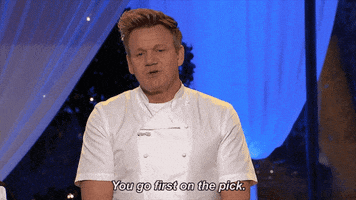

In [35]:
appbyevent.loc[appbyevent['App'] == "AP News"]

,App,Event Count,Activate App,Custom,Search,View Content,Ad Request,Page Views
2,AP News,465,133,325,0,0,7,0


This second table shows the one with the least amount of events which is theatlantic.com

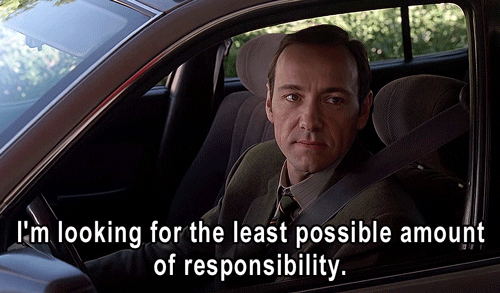

In [37]:
appbyevent.loc[appbyevent['App'] == "theatlantic.com"]

,App,Event Count,Activate App,Custom,Search,View Content,Ad Request,Page Views
261,theatlantic.com,12,0,6,0,5,0,1


In the following coding, we will be creating a new row for the table which will list what type of category our data is under. This will be listed as either an app, website, or unknown if it doesn't know what it is listed under.

In [20]:
sub_apps['App']

0                      U.S. Bank - Inspired by customers
1                                              Egg, Inc.
2                                                AP News
3                                 TikTok - Make Your Day
5                                               kent.edu
13                                                 Slack
14                                        bonappetit.com
15                                           CondÃ© Nast
23     Microsoft Outlook: Organize Your Email & Calendar
30     Spotify: Listen to new music, podcasts, and songs
35                                             wiley.com
36                                       tandfonline.com
37                                           sagepub.com
43                                        brandwatch.com
94                                            newegg.com
114                                              cnn.com
221                                        mobalytics.gg
261                            

In [21]:
cats = ['app', 'app', 'app', 'app', 'site', 'app', 'site', 'unknown', 'app', 'app', 'site', 'site', 'site', 'site', 'site', 'site', 'site', 'site', 'unknown', 'app']
cats

['app',
 'app',
 'app',
 'app',
 'site',
 'app',
 'site',
 'unknown',
 'app',
 'app',
 'site',
 'site',
 'site',
 'site',
 'site',
 'site',
 'site',
 'site',
 'unknown',
 'app']

Here we see the same table we had created earlier, but with the new category row.

In [22]:
sub_apps['category'] = cats
sub_apps

,App,Event Count,Activate App,Custom,Ad Request,View Content,Page Views,category
0,U.S. Bank - Inspired by customers,18,18,0,0,0,0,app
1,"Egg, Inc.",165,109,0,35,0,0,app
2,AP News,465,133,325,7,0,0,app
3,TikTok - Make Your Day,371,99,267,0,0,0,app
5,kent.edu,226,0,0,0,102,124,site
13,Slack,20,1,19,0,0,0,app
14,bonappetit.com,28,0,16,0,0,12,site
15,CondÃ© Nast,14,0,14,0,0,0,unknown
23,Microsoft Outlook: Organize Your Email & Calendar,72,72,0,0,0,0,app
30,"Spotify: Listen to new music, podcasts, and songs",29,29,0,0,0,0,app


#### 4. Data Visualization

So, this is a lot of data so far which can be a bit confusing and maybe overwhelming even when it is put in tables.

Here, we will be creating some graphs in order to make it easier to visualize the data we have collected in our tables so far.

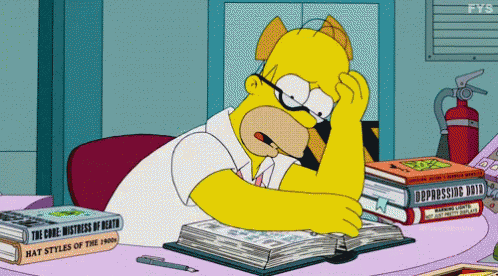

The table below shows the apps/websites with their specific amount of events.

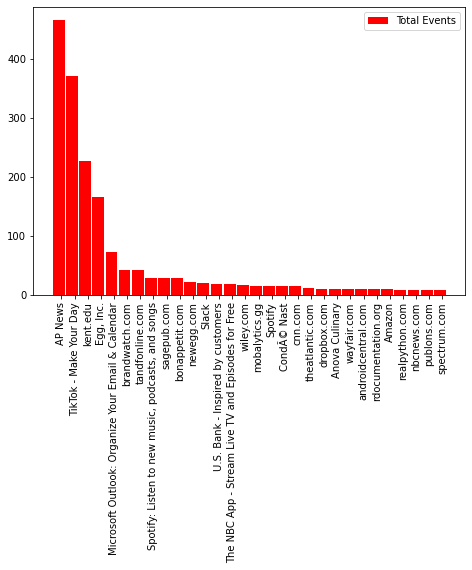

In [31]:
appbyevent = appbyevent.sort_values(by = ['Event Count'], ascending = False)
X = np.arange(30)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, appbyevent['Event Count'][0:30], color = 'r', width = .90)
plt.xticks(ticks=X+.2, labels = list(appbyevent['App'][0:30]), rotation=90)
ax.legend(labels=['Total Events'])
plt.show()

The table below shows the amount of ad requests per app/website. 

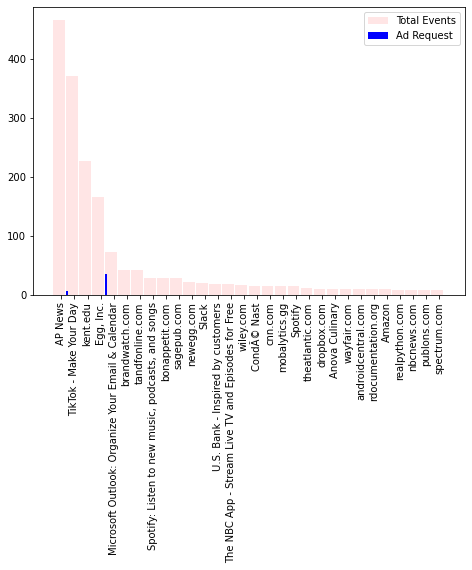

In [34]:
appbyevent = appbyevent.sort_values(by = ['Event Count'], ascending = False)
X = np.arange(30)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, appbyevent['Event Count'][0:30], color = 'r', alpha = .1, width = .90)
ax.bar(X+.60, appbyevent['Ad Request'][0:30], color = 'b', width = .15)
plt.xticks(ticks=X+.2, labels = list(appbyevent['App'][0:30]), rotation=90)
ax.legend(labels=['Total Events', 'Ad Request'])
plt.show()

#### 5. Conclusion

Based on our data analysis and visualisation that was shown above we can tell that there is one account that dominates in regard to the ammount of events and one that is lacking in ammount of events.

The one account that dominates is AP News while the other is CNN.com.

Additionally, based on the graphs meant to visualize this data, we can tell that there isn't much Ad Requesting happening across these palces. The ones with the most Ad Requests are Egg, Inc. at the top followed by TikTok - Make Your Day.

#### 6. Limitations, Alternative Approaches & Next Steps.

A question that has risen from this analysis for me is why there are only 2 websites that have Ad Requests on them since Ad Requests are pretty common across websites in general. Every time you go to a website or an app you see some sort of Ads, but according to these data, you don't see much of it really.

In order to understand this behavior, a thing that can be taken in consideration is how successful these website/apps are and how they create their revenue. Some of them may not need Ads in order to create revenue while others may.